In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import os

import scores


## Reading in the Data

In [6]:
path_f=os.getcwd()

path_f_1=os.path.join(path_f, 'data')


names=[]
for files_txts in os.listdir(path_f_1):
    if files_txts.endswith(".csv"):
        #print(files_txts)
        names.append(files_txts)
        
path_train=os.path.join(path_f_1, names[0])
path_test=os.path.join(path_f_1, names[1])

df_train=pd.read_csv(path_train)
print(df_train.shape)

## Making the Stability Vector a numpy vector

#Transforming the outcome to a numpy vector
stab_vector=df_train['stabilityVec'].values
y=[]
for x in stab_vector:
    #print(x)
    a=np.fromstring(x[1:-1],sep=',').astype(int)
    y.append(a)
y=np.array(y) 

df_tmp = pd.DataFrame(y, columns = ['A', 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B','B'])
stab_vec_list=[ 'A91B', 'A82B','A73B','A64B','A55B','A46B','A37B','A28B','A19B']

df_train=df_train.drop("stabilityVec",axis=1) #removing the results which originally are a string
feature_cols=list(df_train)

print(df_train.shape)

df_train['formulaA']=df_train['formulaA_elements_Number']
df_train['formulaB']=df_train['formulaB_elements_Number']

df_train=pd.concat([df_train, df_tmp],axis=1)
print(df_train.shape)

##Adding an extra column that states whether the elements produce AT LEAST one stable compound

y_all=df_train[stab_vec_list]
df_tmp_stable = pd.DataFrame( columns = ['Stable_compunds'])
df_tmp_stable['Stable_compunds']=np.logical_not(y_all.sum(axis=1)==0).astype(int) ## A one means it has a stable value  a 0 

df_train=pd.concat([df_train, df_tmp_stable],axis=1)
print(df_train.shape)

(2572, 99)
(2572, 98)
(2572, 109)
(2572, 110)


Analyzing the distribution of stable compounds each pair elements can produce


0    1344
1     482
2     369
3     259
4      96
5      20
6       2
dtype: int64


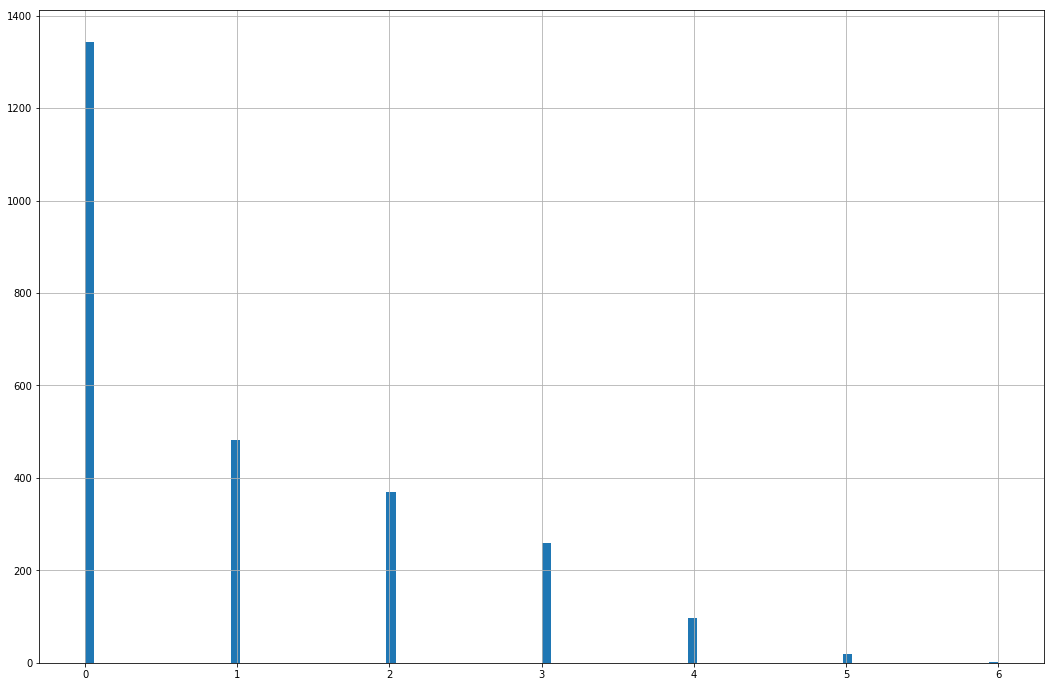

In [8]:
# Observing How many pair produce at least one stable compound
y = df_train[stab_vec_list]
print(y.sum(axis=1).value_counts())
y.sum(axis=1).hist(bins=100, figsize=(18, 12), xlabelsize=10)

We see that roughly 50% of the element pairs produce no stable compounds.



Therefore we will first build a model that determines if the element pair will produce at least one stable compound.

Now let's analyze how many elements produce a stable compound in each component of the stability vector.

0    2522
1      50
Name: A91B, dtype: int64
0    1178
1      50
Name: A91B, dtype: int64
0    580
1     50
Name: A91B, dtype: int64
0    2484
1      88
Name: A82B, dtype: int64
0    1140
1      88
Name: A82B, dtype: int64
0    813
1     88
Name: A82B, dtype: int64
0    1974
1     598
Name: A73B, dtype: int64
0    630
1    598
Name: A73B, dtype: int64
0    626
1    598
Name: A73B, dtype: int64
0    2396
1     176
Name: A64B, dtype: int64
0    1052
1     176
Name: A64B, dtype: int64
0    1002
1     176
Name: A64B, dtype: int64
0    1988
1     584
Name: A55B, dtype: int64
0    644
1    584
Name: A55B, dtype: int64
0    644
1    584
Name: A55B, dtype: int64
0    2387
1     185
Name: A46B, dtype: int64
0    1043
1     185
Name: A46B, dtype: int64
0    990
1    185
Name: A46B, dtype: int64
0    2212
1     360
Name: A37B, dtype: int64
0    868
1    360
Name: A37B, dtype: int64
0    863
1    360
Name: A37B, dtype: int64
0    2180
1     392
Name: A28B, dtype: int64
0    836
1    392
Name: A28B

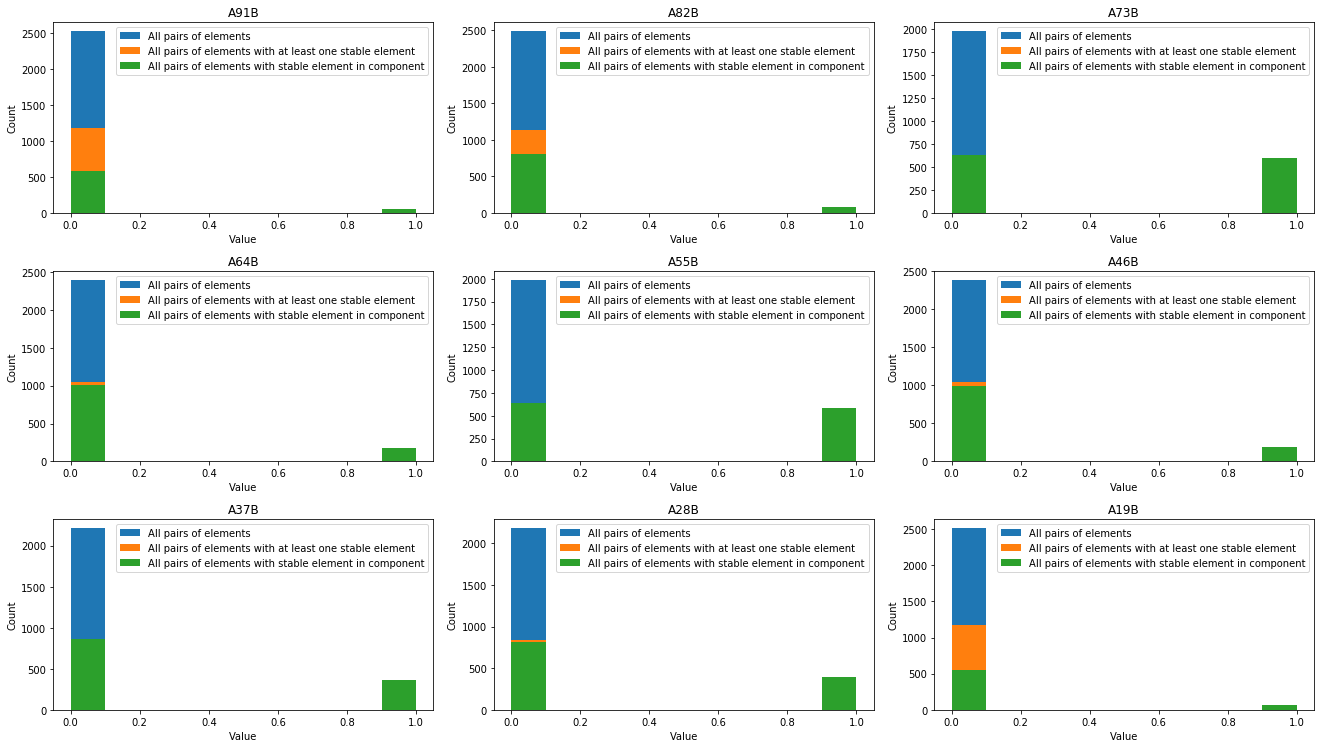

In [39]:
y = df_train[stab_vec_list]
#print(y.sum(axis=1).value_counts())
## Observing how many element pairs produce a stable compound per % and overall
f,a = plt.subplots(3,3)
f.subplots_adjust(hspace=0.4, wspace=0.4)
a = a.ravel()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

y_all=df_train[stab_vec_list]



for count,ax in enumerate(a):
    
    y = df_train[stab_vec_list[count]]
    print(y.value_counts())
    hist_1, bin_edges_1 = np.histogram(y)
    freq_1=hist_1/y.size
    
    ax.hist(y.values, bins=10, label='All pairs of elements')


    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title(stab_vec_list[count])
    ax.set_ylabel('Count')
    ax.set_xlabel('Value')
    
    y_stable=y.loc[np.logical_not(y_all.sum(axis=1)==0)]
    df_stable=df_train[np.logical_not(y_all.sum(axis=1)==0)]
    ax.hist(y_stable.values, bins=10, label='All pairs of elements with at least one stable element')
    print(y_stable.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    #ax.title()
    #print(stab_vec_list[count])
    ax.set_ylabel('Count')
    ax.set_xlabel('Value')
    
    ax.legend(loc='upper right')
    
    
    ax.legend(loc='upper right')
    
    
    stable_comp=df_stable.loc[y_stable==1,['formulaA','formulaB']]
    #print('Compound being analyzed is',stab_vec_list[count])
    stable_comp_num=stable_comp.values
    stable_A=np.unique(stable_comp_num[:,0])
    stable_B=np.unique(stable_comp_num[:,1])
    df_unique= pd.DataFrame()
    #print(df_unique.shape)

    y_unique= pd.DataFrame()
    
    for cnt in range(stable_A.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y_stable.loc[df_train['formulaA']==stable_A[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)
        #print(df_tmp.shape)
        #print(df_unique.shape)
    
    #print(y_unique.shape)

    for cnt in range(stable_B.shape[0]):
        #print(stable_A[cnt])
        df_tmp=y_stable.loc[df_train['formulaB']==stable_B[cnt]]
        y_unique=pd.concat([y_unique, df_tmp],axis=0)

    
    y_unique=y.iloc[y_unique.index.unique()]
    ax.hist(y_unique.values, bins=10, label='All pairs of elements with stable element in component')
    print(y_unique.value_counts())

    #ax.xlim(min(bin_edges), max(bin_edges))
    ax.set_title(stab_vec_list[count])
    #print(stab_vec_list[count])
    ax.set_ylabel('Count')
    ax.set_xlabel('Value')
    
    ax.legend(loc='upper right')
    
    
    ax.legend(loc='upper right')


    


plt.tight_layout()

We will build a model separately for each component of the vector once the previous model has determined that they indeed produce at least one stable compound.